In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7e33397bd4ccce018495dc8b0d0c5e41


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pobe
Processing Record 2 of Set 1 | thyolo
Processing Record 3 of Set 1 | koulikoro
Processing Record 4 of Set 1 | siderno
Processing Record 5 of Set 1 | chardara
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | annau
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | ahuimanu
Processing Record 18 of Set 1 | hervey bay
Processing Record 19 of Set 1 | dobryanka
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | cidreira
Processing

Processing Record 38 of Set 4 | graham
Processing Record 39 of Set 4 | padang
Processing Record 40 of Set 4 | yeniseysk
Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | alugan
Processing Record 43 of Set 4 | lusambo
Processing Record 44 of Set 4 | hong gai
Processing Record 45 of Set 4 | new haven
Processing Record 46 of Set 4 | bahia blanca
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | bull savanna
Processing Record 49 of Set 4 | touros
Processing Record 50 of Set 4 | thai nguyen
Processing Record 1 of Set 5 | kapaa
Processing Record 2 of Set 5 | bambanglipuro
Processing Record 3 of Set 5 | iberia
Processing Record 4 of Set 5 | salekhard
Processing Record 5 of Set 5 | gat
Processing Record 6 of Set 5 | manakara
Processing Record 7 of Set 5 | portland
Processing Record 8 of Set 5 | aklavik
Processing Record 9 of Set 5 | zachagansk
City not found. Skipping...
Processing Record 10 of Set 5 | vadso
Processing Record 11 of Set 5 | el progreso

Processing Record 28 of Set 8 | lorengau
Processing Record 29 of Set 8 | yanam
Processing Record 30 of Set 8 | solec kujawski
Processing Record 31 of Set 8 | villa bruzual
Processing Record 32 of Set 8 | stromness
Processing Record 33 of Set 8 | fujin
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | ugoofaaru
Processing Record 36 of Set 8 | pingliang
Processing Record 37 of Set 8 | roseburg
Processing Record 38 of Set 8 | puerto del rosario
Processing Record 39 of Set 8 | hamilton
Processing Record 40 of Set 8 | espoo
Processing Record 41 of Set 8 | qafsah
City not found. Skipping...
Processing Record 42 of Set 8 | eureka
Processing Record 43 of Set 8 | ambovombe
Processing Record 44 of Set 8 | tuatapere
Processing Record 45 of Set 8 | ostersund
Processing Record 46 of Set 8 | alice springs
Processing Record 47 of Set 8 | tevaitoa
Processing Record 48 of Set 8 | rio grande city
Processing Record 49 of Set 8 | burica
City not found. Skipping...
Processing Record 50

Processing Record 15 of Set 12 | giyon
Processing Record 16 of Set 12 | bansang
Processing Record 17 of Set 12 | caravelas
Processing Record 18 of Set 12 | laguna
Processing Record 19 of Set 12 | yomitan
City not found. Skipping...
Processing Record 20 of Set 12 | cam pha
City not found. Skipping...
Processing Record 21 of Set 12 | ewo
Processing Record 22 of Set 12 | paradwip
City not found. Skipping...
Processing Record 23 of Set 12 | chlorakas
Processing Record 24 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 25 of Set 12 | dubreka
Processing Record 26 of Set 12 | at-bashi
Processing Record 27 of Set 12 | magadan
Processing Record 28 of Set 12 | hualmay
Processing Record 29 of Set 12 | gushikawa
Processing Record 30 of Set 12 | mildura
Processing Record 31 of Set 12 | pedernales
Processing Record 32 of Set 12 | benguela
Processing Record 33 of Set 12 | matay
Processing Record 34 of Set 12 | surt
Processing Record 35 of Set 12 | kieta
Processing Record 36 of Se

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pobe,6.98,2.66,73.58,84,55,6.35,BJ,2020-08-25 18:36:30
1,Thyolo,-16.07,35.14,68.50,60,73,2.86,MW,2020-08-25 18:36:30
2,Koulikoro,14.00,-7.75,72.82,89,100,8.88,ML,2020-08-25 18:36:30
3,Siderno,38.28,16.30,80.60,61,20,11.41,IT,2020-08-25 18:36:30
4,Chardara,41.25,67.97,73.38,48,44,13.44,KZ,2020-08-25 18:36:30
5,Carnarvon,-24.87,113.63,62.60,82,0,16.11,AU,2020-08-25 18:33:02
6,Constitucion,-35.33,-72.42,54.39,77,85,22.57,CL,2020-08-25 18:33:40
7,Bredasdorp,-34.53,20.04,57.20,93,100,10.29,ZA,2020-08-25 18:36:30
8,Saskylakh,71.92,114.08,53.15,60,97,7.49,RU,2020-08-25 18:32:57
9,Tasiilaq,65.61,-37.64,44.60,70,5,9.17,GL,2020-08-25 18:36:30


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pobe,BJ,2020-08-25 18:36:30,6.98,2.66,73.58,84,55,6.35
1,Thyolo,MW,2020-08-25 18:36:30,-16.07,35.14,68.50,60,73,2.86
2,Koulikoro,ML,2020-08-25 18:36:30,14.00,-7.75,72.82,89,100,8.88
3,Siderno,IT,2020-08-25 18:36:30,38.28,16.30,80.60,61,20,11.41
4,Chardara,KZ,2020-08-25 18:36:30,41.25,67.97,73.38,48,44,13.44
...,...,...,...,...,...,...,...,...,...
550,Aba,NG,2020-08-25 18:37:29,5.11,7.37,82.40,78,40,4.70
551,Hambantota,LK,2020-08-25 18:37:29,6.12,81.12,80.78,82,100,11.65
552,Paragominas,BR,2020-08-25 18:37:29,-2.97,-47.48,94.03,34,89,4.03
553,Tyukhtet,RU,2020-08-25 18:37:30,56.54,89.30,52.56,94,95,3.49


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

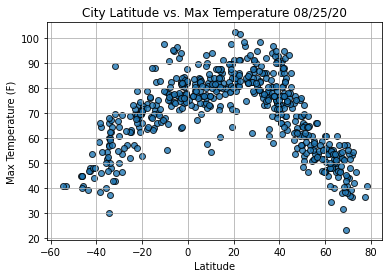

In [14]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

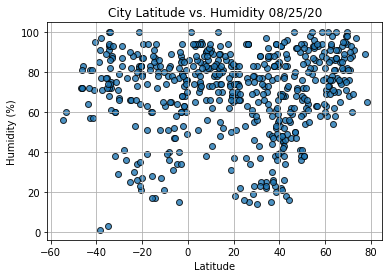

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

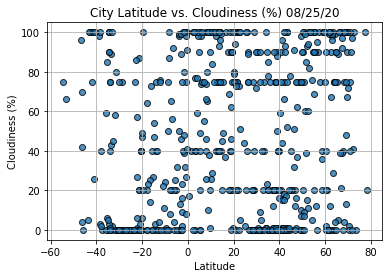

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

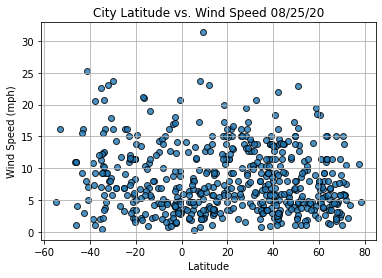

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pobe,BJ,2020-08-25 18:36:30,6.98,2.66,73.58,84,55,6.35
2,Koulikoro,ML,2020-08-25 18:36:30,14.00,-7.75,72.82,89,100,8.88
3,Siderno,IT,2020-08-25 18:36:30,38.28,16.30,80.60,61,20,11.41
4,Chardara,KZ,2020-08-25 18:36:30,41.25,67.97,73.38,48,44,13.44
8,Saskylakh,RU,2020-08-25 18:32:57,71.92,114.08,53.15,60,97,7.49


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

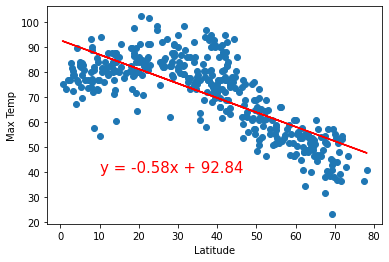

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


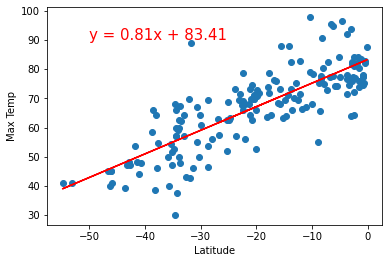

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

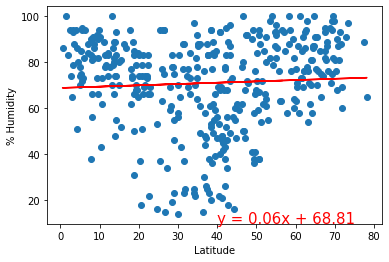

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

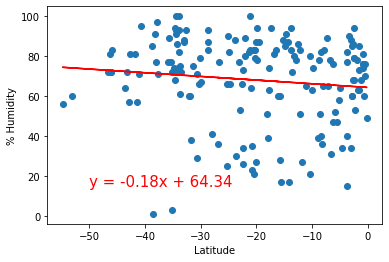

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

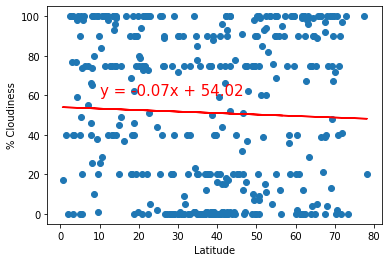

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

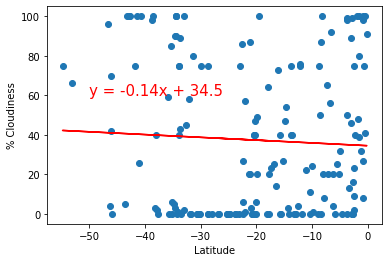

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

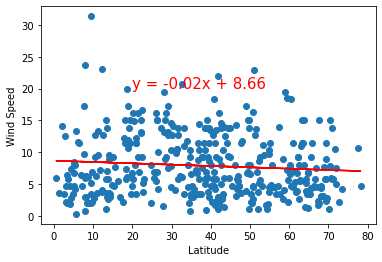

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,20))

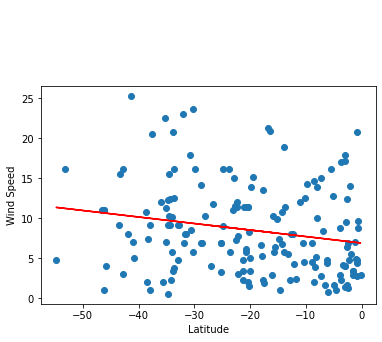

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))